<center><h1>Power Plant Energy Output Prediction and Analysis</h1></center>


Name: Lingduo Luo

Github Username: Lingduo-L

MAIL: lingduoluo109@gmail.com

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from pandas import DataFrame,Series
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

(a) Download and load data

In [2]:
df = pd.read_excel('../Data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


(b) i

There are 9568 rows and 4 columns in this data set.

rows: Each row indicates the average parameter per hour of plant operation when the power plant was set to work with full load, which is the average hourly data received from the measurement points by the sensors

columns: 
(1)
Ambient Temperature (AT): This input variable is measured in whole degrees in Celsius as it varies between 1.81 °C and 37.11 °C.

(2)
Atmospheric Pressure (AP): This input variable is measured in units of minibars with the range of 992.89–1033.30 mbar.

(3)
Relative Humidity (RH): This variable is measured as a percentage from 25.56% to 100.16%.

(4)
Vacuum (Exhaust Steam Pressure, V): This variable is measured in cm Hg with the range of 25.36–81.56 cm Hg.

(5)
Full Load Electrical Power Output (PE): PE is used as a target variable in the dataset. It is measured in mega watt with the range of 420.26–495.76 MW.

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, http://dx.doi.org/10.1016/j.ijepes.2014.02.027. (http://www.sciencedirect.com/science/article/pii/S0142061514000908)

(b) ii

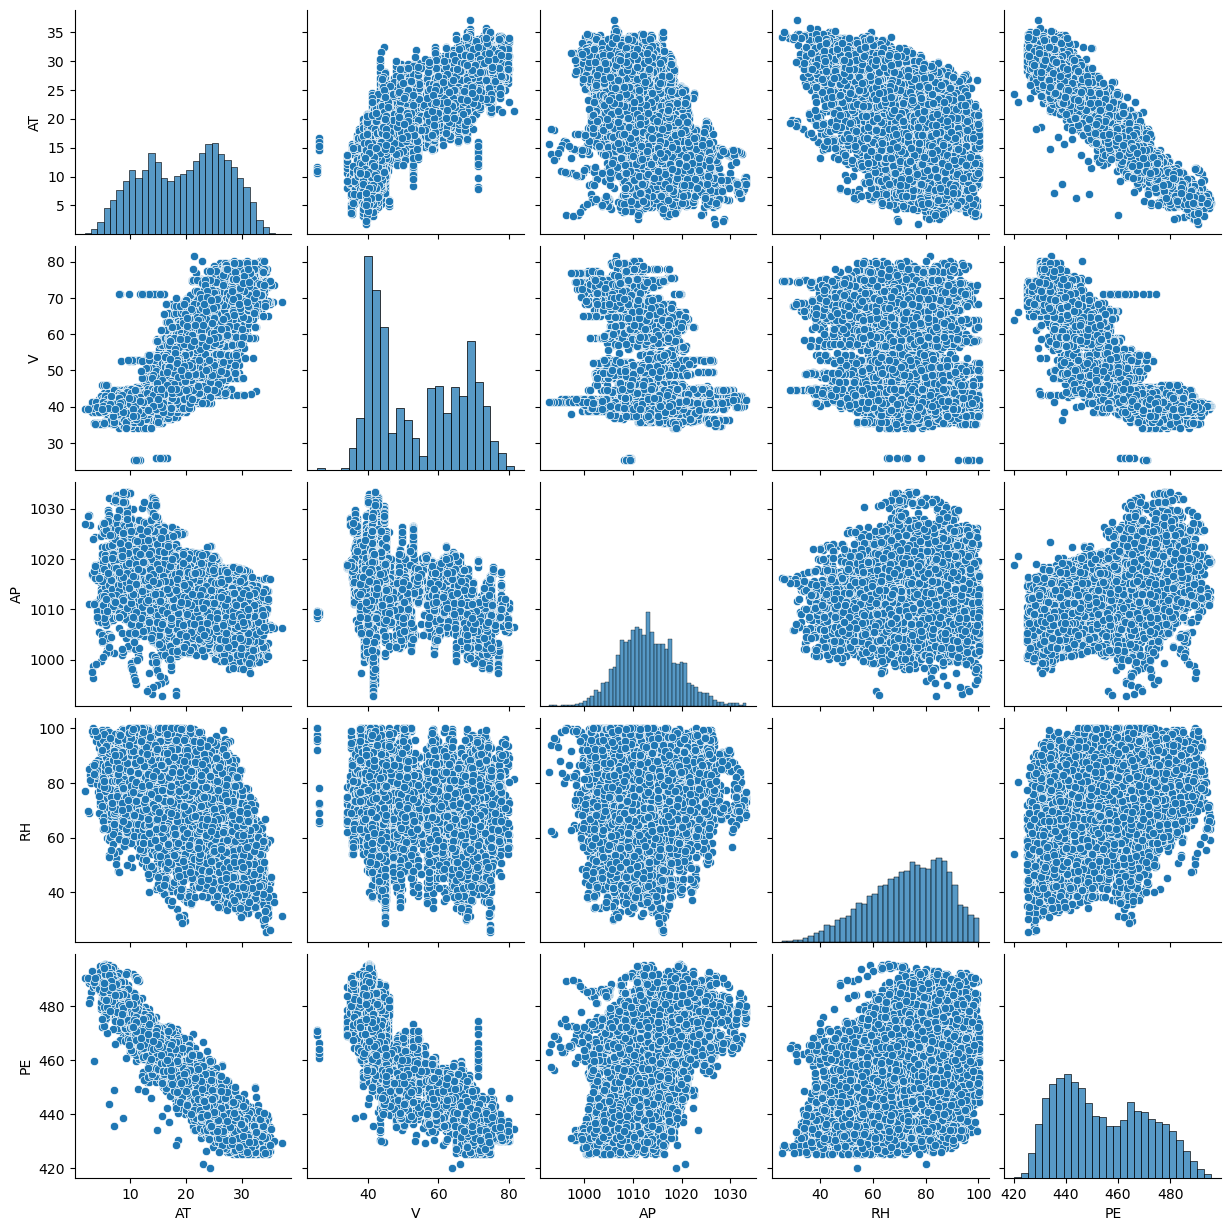

In [3]:
sns.pairplot(df, palette="deep")
plt.show()

According to the figure it can be found that 

(1)
there are some correlations between variables.
i.e. there is a positive correlation between V and AT, while there is a negative correlation between V and PE. Also, PE is negatively correlated with AT.

(2)
also, AP and RH do not have a strong correlation with the PE.

(b) iii

In [4]:
#build null frame
columns1=['AT','V','AP','RH','PE']
index1=['mean','median','range','first quartiles','third quartiles','interquartiles']
frame_1=pd.DataFrame(columns=columns1,index=index1)
print(frame_1)

                  AT    V   AP   RH   PE
mean             NaN  NaN  NaN  NaN  NaN
median           NaN  NaN  NaN  NaN  NaN
range            NaN  NaN  NaN  NaN  NaN
first quartiles  NaN  NaN  NaN  NaN  NaN
third quartiles  NaN  NaN  NaN  NaN  NaN
interquartiles   NaN  NaN  NaN  NaN  NaN


the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset

In [5]:
frame_1.loc['mean'] = df.mean()
frame_1.loc['median'] = df.median()
frame_1.loc['range'] = df.max() - df.min()
frame_1.loc['first quartiles'] = df.quantile(0.25)
frame_1.loc['third quartiles'] =  df.quantile(0.75)
frame_1.loc['interquartiles'] =  (df.quantile(0.75)-df.quantile(0.25))
frame_1

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345,52.08,1012.94,74.975,451.55
range,35.3,56.2,40.41,74.6,75.5
first quartiles,13.51,41.74,1009.1,63.3275,439.75
third quartiles,25.72,66.54,1017.26,84.83,468.43
interquartiles,12.21,24.8,8.16,21.5025,28.68


In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


(c) 
For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [7]:
#build a null dataframe
columns1=['coef in simple linear regression model','coef in multiple linear regression model']
index1=['AT','V','AP','RH']
frame_2=pd.DataFrame(columns=columns1,index=index1)
frame_2

,coef in simple linear regression model,coef in multiple linear regression model
AT,NaN,NaN
V,NaN,NaN
AP,NaN,NaN
RH,NaN,NaN


In [8]:
# Linear regression on each predictor
#AT-PE
pe=df['PE']
at=df['AT']

linreg = LinearRegression()
at = at.values.reshape(9568,1)
linreg.fit(at, pe)
pe_pred = linreg.predict(at)

# plot
plt.subplot(221)
plt.plot(at, pe_pred, linewidth=1, color="b")
plt.title("AT-PE")
plt.xlabel("AT")
plt.ylabel("PE")
plt.axis([0, 40, 410, 500])
plt.scatter(at, pe, marker="o",color="r", s=5)
#plt.yscale('linear')
plt.title('AT-PE')
# print(linreg.coef_)
frame_2.loc['AT','coef in simple linear regression model'] = linreg.coef_
# print(frame_2)
#--------

#V-PE
pe=df['PE']
v=df['V']

linreg = LinearRegression()
v = v.values.reshape(9568,1)
linreg.fit(v, pe)
pe_pred = linreg.predict(v)

# plot
plt.subplot(222)
plt.plot(v, pe_pred, linewidth=1, color="b")
plt.title("V-PE")
plt.xlabel("V")
plt.ylabel("PE")
# plt.axis([0, 40, 410, 500])
plt.scatter(v, pe, marker="o",color="r", s=5)
#plt.yscale('linear')
plt.title('V-PE')
# print(linreg.coef_)
frame_2.loc['V','coef in simple linear regression model'] = linreg.coef_
# print(frame_2)

#--------

#AP-PE
pe=df['PE']
ap=df['AP']

linreg = LinearRegression()
ap = ap.values.reshape(9568,1)
linreg.fit(ap, pe)
pe_pred = linreg.predict(ap)

# plot
plt.subplot(223)
plt.plot(ap, pe_pred, linewidth=1, color="b")
plt.title("AP-PE")
plt.xlabel("AP")
plt.ylabel("PE")
# plt.axis([0, 40, 410, 500])
plt.scatter(ap, pe, marker="o",color="r", s=5)
#plt.yscale('linear')
plt.title('AP-PE')
# print(linreg.coef_)
frame_2.loc['AP','coef in simple linear regression model'] = linreg.coef_
# print(frame_2)

#--------

#RH-PE
pe=df['PE']
rh=df['RH']

linreg = LinearRegression()
rh = rh.values.reshape(9568,1)
linreg.fit(rh, pe)
pe_pred = linreg.predict(rh)

# plot
plt.subplot(224)
plt.plot(rh, pe_pred, linewidth=1, color="b")
plt.title("RH-PE")
plt.xlabel("RH")
plt.ylabel("PE")
# plt.axis([0, 40, 410, 500])
plt.scatter(rh, pe, marker="o",color="r", s=2)
#plt.yscale('linear')
plt.title('RH-PE')
# print(linreg.coef_)
frame_2.loc['RH','coef in simple linear regression model'] = linreg.coef_



plt.subplots_adjust(top=3, bottom=2, left=0.1, right=0.95, hspace=0.5,
                    wspace=0.3)
frame_2

,coef in simple linear regression model,coef in multiple linear regression model
AT,[-2.171319958517791],NaN
V,[-1.1681351265557116],NaN
AP,[1.4898716733991164],NaN
RH,[0.45565010226297986],NaN


Break these four graphs down and analysis them one by one:

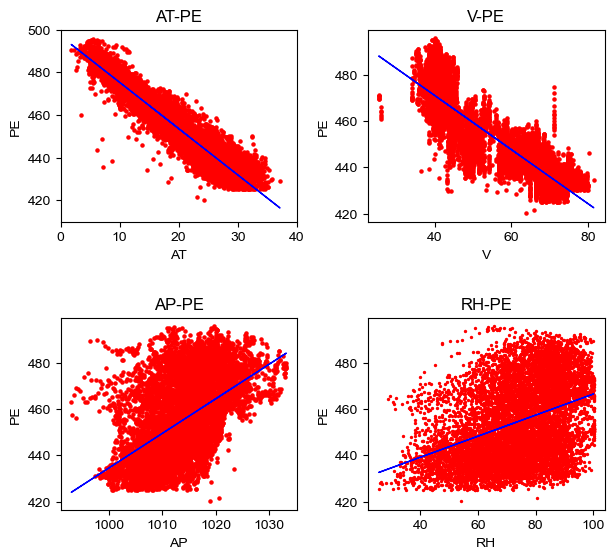

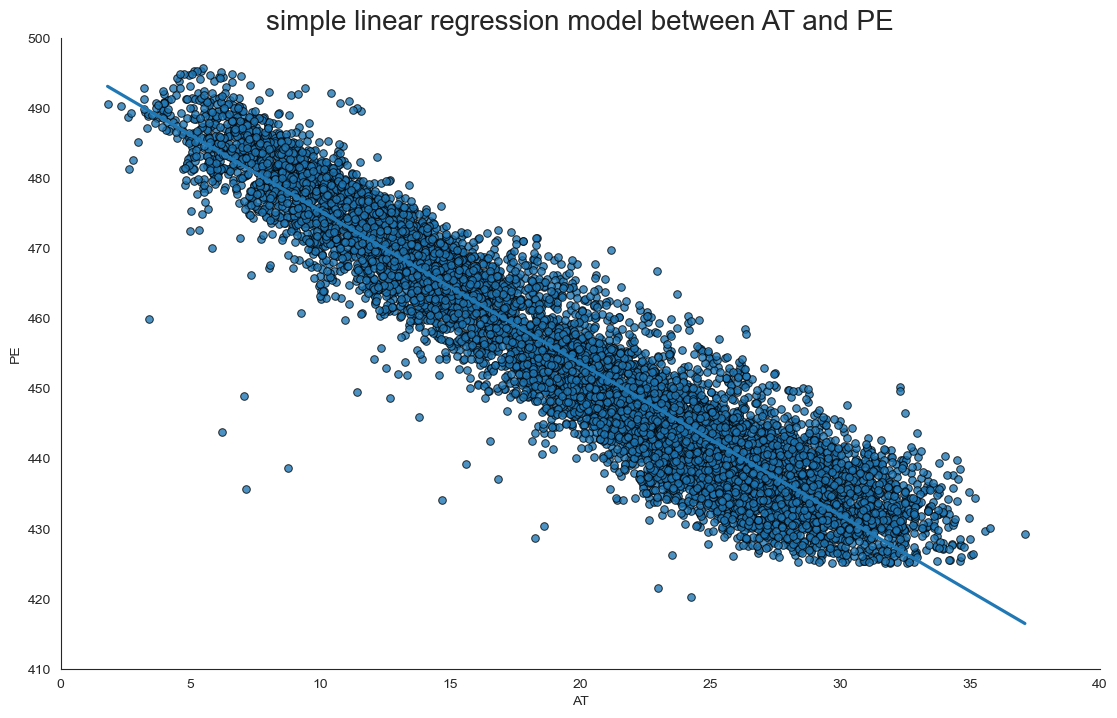

In [9]:
# AT and PE
sns.set_style('white')
gridpic = sns.lmplot(x = 'AT',
                   y = 'PE',
                    data = df,
                    height = 7,
                    aspect = 1.6,
#                     palette = 'dark',
                    scatter_kws = dict(s = 30, linewidths = .7, edgecolors = 'black'))

gridpic.set(xlim = (0, 40), ylim = (410, 500))
plt.title("simple linear regression model between AT and PE", fontsize=20)

plt.show()

It can be seen that an increase in temperature leads to a decrease in performance. There is a negative linear correlation between AT and PE.

There are no particular outliers to deal with.

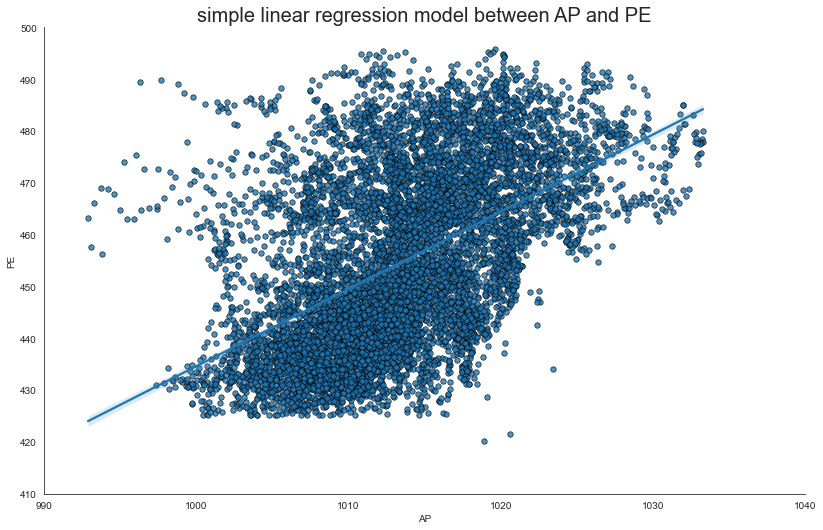

In [179]:
# AP and PE
sns.set_style('white')
gridpic = sns.lmplot(x = 'AP',
                   y = 'PE',
                    data = df,
                    height = 7,
                    aspect = 1.6,
#                     palette = 'dark',
                    scatter_kws = dict(s = 30, linewidths = .7, edgecolors = 'black'))

gridpic.set(xlim = (990, 1040), ylim = (410, 500))
plt.title("simple linear regression model between AP and PE", fontsize=20)

plt.show()

PE increased with increasing AP, however, the correlation between PE and AP was not strong.
There are no particular outliers to deal with.

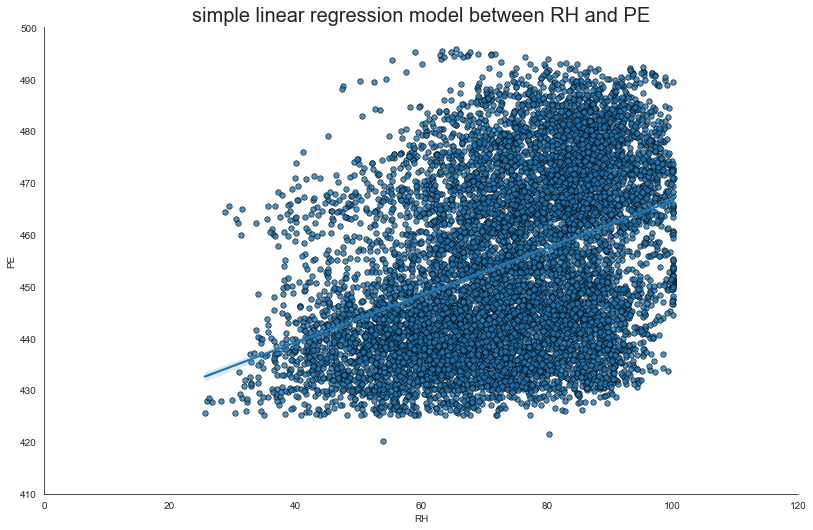

In [180]:
# RH and PE
sns.set_style('white')
gridpic = sns.lmplot(x = 'RH',
                   y = 'PE',
                    data = df,
                    height = 7,
                    aspect = 1.6,
#                     palette = 'dark',
                    scatter_kws = dict(s = 30, linewidths = .7, edgecolors = 'black'))

gridpic.set(xlim = (0, 120), ylim = (410, 500))
plt.title("simple linear regression model between RH and PE", fontsize=20)

plt.show()

Performance will improve to some extent with increasing RH. 

There are no particular outliers to deal with.

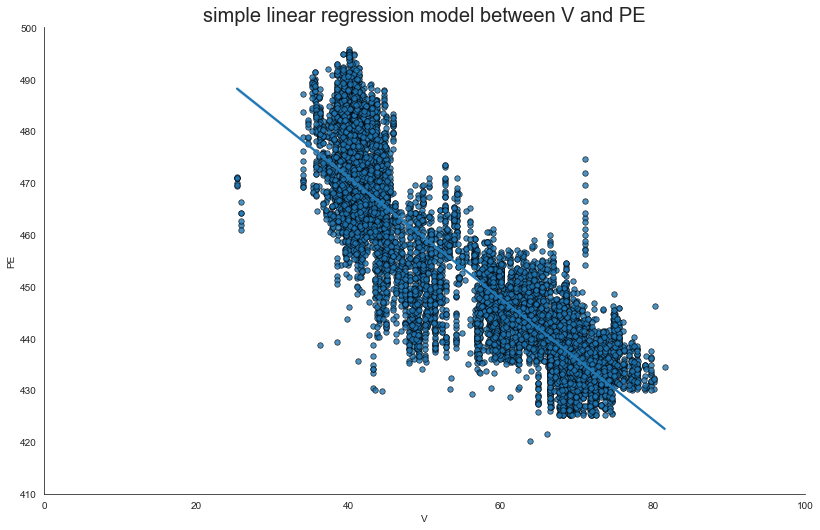

In [181]:
# V and PE
sns.set_style('white')
gridpic = sns.lmplot(x = 'V',
                   y = 'PE',
                    data = df,
                    height = 7,
                    aspect = 1.6,
#                     palette = 'dark',
                    scatter_kws = dict(s = 30, linewidths = .7, edgecolors = 'black'))

gridpic.set(xlim = (0, 100), ylim = (410, 500))
plt.title("simple linear regression model between V and PE", fontsize=20)

plt.show()

As shown in the figure, PE is inversely proportional to V. At the same time, there are some outliers around V=28 and V=72 that need to be dealt with.

(d) Fit a multiple regression model to predict the response using all of the predictors.

In [10]:
x = df[['AT','V','AP','RH']]
y = df[['PE']]
x=sm.add_constant(x) #添加常数项
est=sm.OLS(y,x)
model=est.fit()#建立最小二乘回归模型
print(x)
print(y)

print(model.summary())

      const     AT      V       AP     RH
0       1.0  14.96  41.76  1024.07  73.17
1       1.0  25.18  62.96  1020.04  59.08
2       1.0   5.11  39.40  1012.16  92.14
3       1.0  20.86  57.32  1010.24  76.64
4       1.0  10.82  37.50  1009.23  96.62
...     ...    ...    ...      ...    ...
9563    1.0  16.65  49.69  1014.01  91.00
9564    1.0  13.19  39.18  1023.67  66.78
9565    1.0  31.32  74.33  1012.92  36.48
9566    1.0  24.48  69.45  1013.86  62.39
9567    1.0  21.60  62.52  1017.23  67.87

[9568 rows x 5 columns]
          PE
0     463.26
1     444.37
2     488.56
3     446.48
4     473.90
...      ...
9563  460.03
9564  469.62
9565  429.57
9566  435.74
9567  453.28

[9568 rows x 1 columns]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic: 

This is the result of a multivariate regression model. 
In the model, PE is a dependent variable, while AT, V, AP and RH are independent variables. 
The R-squared of the model is 0.929, indicating that the independent variable can explain the variance of 92.9% of the dependent variable. 
The constants of the model are 454.6093, and the coefficients of AT, V, AP and RH are -1.9775, -0.2339, 0.0621 and -0.1581 respectively. 
These coefficients explain the relationship between independent variables and dependent variables, which can be used to predict the value of PE. 
The standard error, t value, P value and confidence interval of each coefficient are also given. 
At the same time, statistics such as Omnibus, Durbin-Watson, Jarque-Bera and Kurtosis are also given to help evaluate the adaptability and effectiveness of the model.
Finally, it is noted that the number of conditions is very large, which may indicate that there are strong multiple colinearities or other numerical problems.

In [13]:
model_2 = LinearRegression()
model_2.fit(x,y)
a  = model_2.intercept_
b = model_2.coef_

print("intercept -> ",a,",coef -> ",b)

intercept ->  [454.60927432] ,coef ->  [[ 0.         -1.97751311 -0.23391642  0.06208294 -0.1580541 ]]


In [14]:
#shows the p values
model.pvalues
print(model.pvalues)

const     0.000000e+00
AT        0.000000e+00
V        4.375305e-215
AP        5.507109e-11
RH       3.104584e-293
dtype: float64


In [185]:
# np.set_printoptions(suppress=True)
# model.pvalues//10**300

As can be seen from the above graph, Adj. R-squared is high, which means that our model explains 92% of the variation in PE variables. We got a values 0.00 of  Prob (F-Statistic). And Prob (F-Statistic) uses this number to tell the accuracy of the null hypothesis. 

We obtained the multiple linear regression equation as:
PE = 454.6093 - 1.9775*AT - 0.2339*V + 0.0621*AP - 0.1581*RH

As can be seen from the code results, the values of predictors are all much smaller than 0.05. Therefore, I think that we can reject the null hypothesis for all predictors.

(e) results from 1c compare to results from 1d

In [15]:
frame_2['coef in multiple linear regression model'] = [-1.9775,-0.2339,0.0621,-0.1581]
frame_2

,coef in simple linear regression model,coef in multiple linear regression model
AT,[-2.171319958517791],-1.9775
V,[-1.1681351265557116],-0.2339
AP,[1.4898716733991164],0.0621
RH,[0.45565010226297986],-0.1581


In [16]:
frame_2.plot.scatter(x='coef in simple linear regression model', y='coef in multiple linear regression model', s=40, c='red')

<AxesSubplot:xlabel='coef in simple linear regression model', ylabel='coef in multiple linear regression model'>

Honestly, the difference between the results I got from c and d is quite obvious. simple linear regression model has more extreme results, while coef in multiple linear regression mode is closer. But in general, their positive and negative correlations are basically the same, except for the coefficient of RH which is different in the two results.

(f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form...

In [17]:
df_x=df['AT']
df_x = df_x.values.reshape(-1, 1)
# print(df_x)

# df_x = df.drop(columns=['PE'])
# df_x = df_x.drop(columns=['coef in multiple linear regression model'])
# # X_testing.head()
# df_x = df_x.values.reshape(-1,1)

df_y=df['PE']
df_y = df_y.values.reshape(-1,1)

poly = PolynomialFeatures(degree = 3)
# poly_x = poly.fit(x)
poly_x = poly.fit_transform(df_x) # 9568 
# print(poly_x)

poly_x = sm.add_constant(poly_x)
poly_model = sm.OLS(df_y,poly_x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:31:14   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [21]:
index1 = ['AT', 'V', 'AP', 'RH']
for i in index1:
    
    df_x=df[i]
    df_x = df_x.values.reshape(-1, 1)
    df_x=df_x.reshape(df_x.shape[0],1)


    df_y=df['PE']
    df_y = df_y.values.reshape(-1,1)

    poly = PolynomialFeatures(degree = 3)
    # poly_x = poly.fit(x)
    poly_x = poly.fit_transform(df_x) # 9568 
    # print(poly_x)
    poly_x = sm.add_constant(poly_x)
    poly_model = sm.OLS(df_y,poly_x).fit()
    print(i)
    print('r squard: ',poly_model.rsquared)
    print('p values: ',poly_model.pvalues)

AT
r squard:  0.9118826627742724
p values:  [0.00000000e+000 7.89814724e-007 8.83304533e-073 3.65218456e-110]
V
r squard:  0.7750219775589422
p values:  [0.00000000e+00 2.52658903e-05 7.68496944e-01 1.37348859e-02]
AP
r squard:  0.2748633041651588
p values:  [4.50273363e-17 4.50273543e-17 3.66670487e-17 8.26414564e-18]
RH
r squard:  0.15374253544345973
p values:  [0.00000000e+00 3.77250991e-04 9.39542959e-06 1.44027851e-05]


The r squard of AP and RH is small compared to each other, thus indicating a nonlinear association between them and PE.

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [22]:
df_g=df.drop(columns=['PE']).values
poly = PolynomialFeatures(degree = 2,interaction_only = True, include_bias = True)
poly_x = poly.fit_transform(df_g) 

poly_x = sm.add_constant(poly_x)
model = sm.OLS(df_y,poly_x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:46:28   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
x1            -4.3470      2.373     -1.832      0.067      -8.999       0.305
x2            -7.6749      1.351     -5.682      0.000     -10.323      -5.027
x3            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
x4             1.5709      0.773      2.031      0.042       0.055       3.087
x5             0.0210      0.001     23.338      0.000       0.019       0.023
x6             0.0018      0.002      0.752      0.452      -0.003       0.006
x7            -0.0052      0.001     -6.444      0.000      -0.007      -0.004
x8             0.0068      0.001      5.135      0.000       0.004       0.009
x9             0.0008      0.000      1.716      0.086      -0.000       0.002
x10           -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R square value of the model is 0.936, indicating that the model explains 93.6% of the variance of the target variable.

The adjusted R square value is also 0.936, indicating that the model is not overfitting.

The saliency level of the F statistic is less than 0.05, indicating that the model is significant.

Residual standard error (Std Err) is used to measure the predictive accuracy of the model. Among them, the coefficients of some independent variables (x1, x2, x3, x4, x7, x8 and x10) are significant (p value less than 0.05), while the coefficients of other independent variables (x5 and x9) are not significant (p value greater than 0.05).

The normality of the residual was tested, because the JB value is 9170.848 (significant), which means that the residual does not obey the normal distribution.

Number of conditions (Cond. No.) The value is 1.7e+08, which may indicate that the model has multiple colinearities or other numerical problems.

Based on the OLS regression results, if we have to remove some predictors, we should consider removing x1 (with p-value of 0.067) and x9 (with p-value of 0.086) as they have relatively higher p-values compared to the other predictors.

p>|t| means how likely the coefficient is measured through model by chance.
The correspondence in the table is as follows,
x1 (AT)  
x2 (V)  
x3 (AP)  
x4 (RH)  
x5 (AT&V)  
x6 (AT&AP)  
x7 (AT&RH)  
x8 (V&AP)  
x9 (V&RH)  
x10 (AP&RH)  
Thus,X2(V),X5(AT&V),X7(AT&RH) and X8(V&AP) are more infulential.

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test
MSEs.

In [23]:
# randomly selected 70% subset of the data with all predictors

X_h = df[['AT', 'V', 'AP', 'RH']]
y_h = df[['PE']]

X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size=0.3)
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))

Train Data X Shape (6697, 4), y Shape (6697, 1)
Test Data X Shape (2871, 4), y Shape (2871, 1)


In [24]:
poly = PolynomialFeatures(degree = 2,interaction_only = False, include_bias = True)
poly_x = poly.fit_transform(X_train) 

poly_x = sm.add_constant(poly_x)
model = sm.OLS(y_train,poly_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7088.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:48:03   Log-Likelihood:                -19280.
No. Observations:                6697   AIC:                         3.859e+04
Df Residuals:                    6682   BIC:                         3.869e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8078.0266   1444.505     -5.592      0.000   -1.09e+04   -5246.336
x1            -4.5058      3.678     -1.225      0.221     -11.715       2.704
x2            -2.8716      1.796     -1.599      0.110      -6.392       0.648
x3            16.6753      2.800      5.956      0.000      11.187      22.164
x4             4.8040      1.069      4.496      0.000       2.709       6.899
x5             0.0148      0.004      4.035      0.000       0.008       0.022
x6             0.0115      0.003      3.630      0.000       0.005       0.018
x7             0.0020      0.004      0.569      0.569      -0.005       0.009
x8            -0.0077      0.002     -4.302      0.000      -0.011      -0.004
x9            -0.0008      0.001     -0.871      0.384      -0.003       0.001
x10            0.0023      0.002      1.341      0.180      -0.001       0.006
x11            0.0007      0.001      0.931      0.352      -0.001       0.002
x12           -0.0081      0.001     -5.958      0.000      -0.011      -0.005
x13           -0.0045      0.001     -4.315      0.000      -0.006      -0.002
x14           -0.0021      0.000     -6.387      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1457.108   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12193.869
Skew:                          -0.807   Prob(JB):                         0.00
Kurtosis:                       9.411   Cond. No.                     2.83e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# MSE & RMSE
# train
poly = PolynomialFeatures(degree = 2,interaction_only = False, include_bias = True)
# X_trian = poly.fit_transform(X_train) 
X_train1 = poly.fit_transform(X_train) 
# print(X_train)
X_train1 = sm.add_constant(X_train1)


model = sm.OLS(y_train,X_train1).fit()
# print(model.summary())
ytrain_pred = model.predict(X_train1)

print("train MSE:", metrics.mean_squared_error(y_train, ytrain_pred))
print("train RMSE", np.sqrt(metrics.mean_squared_error(y_train, ytrain_pred)))

train MSE: 18.53991352654121
train RMSE 4.305799986824889


In [26]:
# MSE & RMSE
# test
poly = PolynomialFeatures(degree = 2,interaction_only = False, include_bias = True)
X_test1 = poly.fit_transform(X_test) 

X_test1 = sm.add_constant(X_test1)
model = sm.OLS(y_test,X_test1).fit()
ytest_pred = model.predict(X_test1)

print("test MSE:", metrics.mean_squared_error(y_test, ytest_pred))
print("test RMSE", np.sqrt(metrics.mean_squared_error(y_test, ytest_pred)))

test MSE: 17.004159860437387
test RMSE 4.1236100519371846


remove the insignificant variables

In [31]:
poly_x

array([[1.00000000e+00, 8.26000000e+00, 4.09600000e+01, ...,
        1.05109655e+06, 9.14710206e+04, 7.96020840e+03],
       [1.00000000e+00, 2.75800000e+01, 7.30600000e+01, ...,
        1.01935274e+06, 8.91604253e+04, 7.79865610e+03],
       [1.00000000e+00, 2.24700000e+01, 4.86000000e+01, ...,
        1.00466543e+06, 6.33773259e+04, 3.99803290e+03],
       ...,
       [1.00000000e+00, 2.70000000e+01, 6.94000000e+01, ...,
        1.00974362e+06, 8.25994920e+04, 6.75684000e+03],
       [1.00000000e+00, 2.71600000e+01, 5.98700000e+01, ...,
        1.02369877e+06, 5.95331352e+04, 3.46214560e+03],
       [1.00000000e+00, 2.81800000e+01, 7.75400000e+01, ...,
        1.02412376e+06, 7.56158928e+04, 5.58307840e+03]])

In [32]:
poly_x_del = np.delete(poly_x, [1,2], axis=1)

model2 = sm.OLS(y_train,poly_x_del).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     8248.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:51:17   Log-Likelihood:                -19289.
No. Observations:                6697   AIC:                         3.860e+04
Df Residuals:                    6684   BIC:                         3.869e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.137e+04   1120.472    -10.144      0.000   -1.36e+04   -9170.024
x1            22.7960      2.212     10.305      0.000      18.459      27.133
x2             6.8472      0.784      8.730      0.000       5.310       8.385
x3             0.0137      0.003      4.300      0.000       0.007       0.020
x4             0.0094      0.003      3.266      0.001       0.004       0.015
x5            -0.0022      0.000    -15.540      0.000      -0.002      -0.002
x6            -0.0090      0.002     -5.449      0.000      -0.012      -0.006
x7            -0.0007      0.001     -0.778      0.436      -0.003       0.001
x8            -0.0004   8.02e-05     -5.443      0.000      -0.001      -0.000
x9             0.0004      0.001      0.583      0.560      -0.001       0.002
x10           -0.0109      0.001    -10.011      0.000      -0.013      -0.009
x11           -0.0064      0.001     -8.458      0.000      -0.008      -0.005
x12           -0.0022      0.000     -7.073      0.000      -0.003      -0.002
==============================================================================
Omnibus:                     1454.797   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11775.063
Skew:                          -0.815   Prob(JB):                         0.00
Kurtosis:                       9.288   Cond. No.                     2.19e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# MSE & RMSE
# train
poly = PolynomialFeatures(degree = 2,interaction_only = False, include_bias = True)
# X_trian = poly.fit_transform(X_train) 
X_train2 = poly.fit_transform(X_train) 
# print(X_train)
X_train2 = sm.add_constant(X_train2)
X_train2_del = np.delete(X_train2, [1,2], axis=1)

model = sm.OLS(y_train,X_train2_del).fit()
# print(model.summary())
ytrain2_pred = model2.predict(X_train2_del)

print("train MSE aftrt removed the insignificant variables:", metrics.mean_squared_error(y_train, ytrain2_pred))
print("train RMSE aftrt removed the insignificant variables:", np.sqrt(metrics.mean_squared_error(y_train, ytrain2_pred)))

train MSE aftrt removed the insignificant variables: 18.589638479270135
train RMSE aftrt removed the insignificant variables: 4.311570303180749


In [50]:
# MSE & RMSE
# test
poly = PolynomialFeatures(degree = 2,interaction_only = False, include_bias = True)
X_test2 = poly.fit_transform(X_test) 

X_test2 = sm.add_constant(X_test2)
X_test2_del = np.delete(X_test2, [1,2], axis=1)

model = sm.OLS(y_test,X_test2_del).fit()
ytest2_pred = model2.predict(X_test2_del)

print("test MSE aftrt removed the insignificant variables:", metrics.mean_squared_error(y_test, ytest2_pred))
print("test RMSE aftrt removed the insignificant variables:", np.sqrt(metrics.mean_squared_error(y_test, ytest2_pred)))

test MSE aftrt removed the insignificant variables: 17.214709689243367
test RMSE aftrt removed the insignificant variables: 4.14906130217949


(i) KNN Regression

raw features KNN (test and trining error)

In [51]:
# randomly selected 70% subset of the data with all predictors

X_h = df[['AT', 'V', 'AP', 'RH']]
y_h = df[['PE']]

X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size=0.3)
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))

Train Data X Shape (6697, 4), y Shape (6697, 1)
Test Data X Shape (2871, 4), y Shape (2871, 1)


In [52]:
# randomly selected 70% subset of the data with all predictors

X_h = df[['AT', 'V', 'AP', 'RH']]
y_h = df[['PE']]

X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size=0.3)
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))

Train Data X Shape (6697, 4), y Shape (6697, 1)
Test Data X Shape (2871, 4), y Shape (2871, 1)


the smallest test error is:  0.047611753943666124 , when k =  5
the smallest train error is:  0.0 , when k =  1


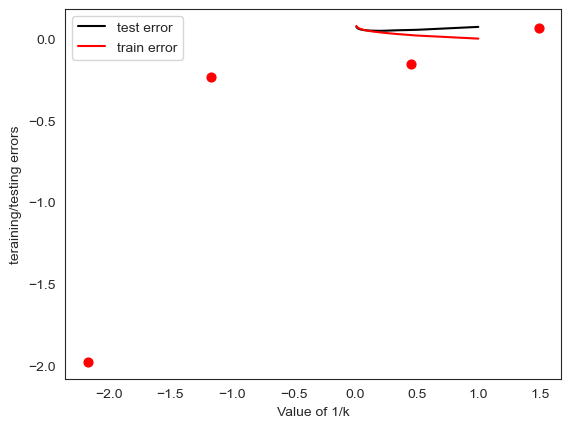

In [53]:
k_range = range(1, 101, 1)
test_scores = []
train_scores = []
k_test = []
k_train= []
for k in k_range:
    a = 1/k
    
    #test
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
#     knn.predict(X_testing)[0:5]
    knn_test_predict=knn.predict(X_test)
    b = knn.score(X_test, y_test)
    test_scores.append(1-b)
    k_test.append(1/k)
    
    #train   
#     knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
#     knn.predict(X_testing)[0:5]
    knn_train_predict=knn.predict(X_train)
    c = knn.score(X_train, y_train)
    train_scores.append(1-c)
    k_train.append(1/k)

#test
test_error = min(test_scores)
Kbest_test = k_range[test_scores.index(min(test_scores))]
print("the smallest test error is: ", test_error, ", when k = ",Kbest_test)


#train
train_error = min(train_scores)
Kbest_train = k_range[train_scores.index(min(train_scores))]
print("the smallest train error is: ", train_error,", when k = ",Kbest_train)

plt.plot(k_test, test_scores,color='black',label='test error')
plt.plot(k_train, train_scores,color='red',label ='train error')

plt.xlabel('Value of 1/k')
plt.ylabel('teraining/testing errors')

plt.legend()
plt.show()

Normalized feature KNN (test and trining error)

In [201]:
# randomly selected 70% subset of the data with all predictors

X_h = df[['AT', 'V', 'AP', 'RH']]
y_h = df[['PE']]

X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size=0.3)
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))

Train Data X Shape (6697, 4), y Shape (6697, 1)
Test Data X Shape (2871, 4), y Shape (2871, 1)


In [202]:
# normalized
print(X_train)

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
# X_train

         AT      V       AP     RH
2090  32.84  74.67  1015.89  31.81
6058  21.47  60.77  1018.06  85.73
7885  15.38  43.99  1022.42  83.41
505   10.23  41.46  1020.45  84.95
242   22.43  63.21  1012.06  84.75
...     ...    ...      ...    ...
762   15.57  44.68  1022.01  90.02
5546  11.80  43.22  1008.57  78.01
1866  10.33  41.44  1015.24  86.72
4647   7.71  40.71  1021.53  95.48
9504  22.41  70.98  1005.67  95.03

[6697 rows x 4 columns]


the smallest normalized test error is:  0.05092880985412451 , when k =  4
the smallest normalized train error is:  0.0 , when k =  1


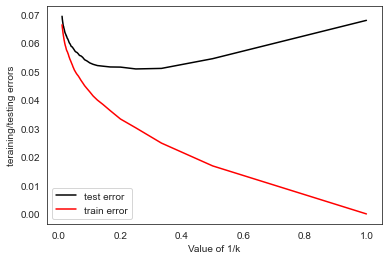

In [203]:
k_range = range(1, 101, 1)
test_scores = []
train_scores = []
k_test = []
k_train= []
for k in k_range:
    a = 1/k
    
    #test
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
#     knn.predict(X_testing)[0:5]
    knn_test_predict=knn.predict(X_test)
    b = knn.score(X_test, y_test)
    test_scores.append(1-b)
    k_test.append(1/k)
    
    #train   
#     knn = KNeighborsRegressor(n_neighbors=k)
#     knn.fit(X_train,y_train)
#     knn.predict(X_testing)[0:5]
    knn_train_predict=knn.predict(X_train)
    c = knn.score(X_train, y_train)
    train_scores.append(1-c)
    k_train.append(1/k)

#test
test_error = min(test_scores)
Kbest_test = k_range[test_scores.index(min(test_scores))]
print("the smallest normalized test error is: ", test_error, ", when k = ",Kbest_test)


#train
train_error = min(train_scores)
Kbest_train = k_range[train_scores.index(min(train_scores))]
print("the smallest normalized train error is: ", train_error,", when k = ",Kbest_train)

plt.plot(k_test, test_scores,color='black',label='test error')
plt.plot(k_train, train_scores,color='red',label ='train error')

plt.xlabel('Value of 1/k')
plt.ylabel('teraining/testing errors')

plt.legend()
plt.show()

MSE

raw features KNN (MSE)

In [204]:
# randomly selected 70% subset of the data with all predictors

X_h = df[['AT', 'V', 'AP', 'RH']]
y_h = df[['PE']]

X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size=0.3)
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))

Train Data X Shape (6697, 4), y Shape (6697, 1)
Test Data X Shape (2871, 4), y Shape (2871, 1)


the smallest training MSE is:  0.0 , when k =  1
the smallest testing MSE is:  16.473787487286653 , when k =  5


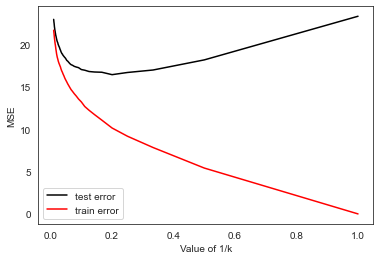

In [205]:
k_range = range(1, 101, 1)
# test_scores_N = []
# train_scores_N = []
k_test = []
k_train= []
RMSE_test = []
RMSE_train = []
for k in k_range:
    a = 1/k
    
    #test
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
#     knn.predict(X_testing)[0:5]
    knn_test_predict=knn.predict(X_test)
    b = knn.score(X_test, y_test)
#     test_scores_N.append(1-b)
    k_test.append(1/k)
    
#     RMSE_test
    RMSE_testing = metrics.mean_squared_error(y_test, knn_test_predict)
    RMSE_test.append(RMSE_testing)    
    
    #train   
#     knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
#     knn.predict(X_testing)[0:5]
    knn_train_predict=knn.predict(X_train)
    c = knn.score(X_train, y_train)
#     train_scores_N.append(1-c)
    k_train.append(1/k)
    
    #RMSE_train
    RMSE_training = metrics.mean_squared_error(y_train, knn_train_predict)
    RMSE_train.append(RMSE_training)
    
#train
train_error = min(RMSE_train)
kBestRMSE_train = k_range[RMSE_train.index(min(RMSE_train))]
print("the smallest training MSE is: ", train_error,", when k = ",kBestRMSE_train)

#test
test_error = min(RMSE_test)
kBestRMSE_test = k_range[RMSE_test.index(min(RMSE_test))]
print("the smallest testing MSE is: ", test_error,", when k = ",kBestRMSE_test)
    
plt.plot(k_test, RMSE_test,color='black',label='test error')
plt.plot(k_train, RMSE_train,color='red',label ='train error')

plt.xlabel('Value of 1/k')
plt.ylabel('MSE')

plt.legend()
plt.show()

normalized features KNN (MSE)

In [206]:
# randomly selected 70% subset of the data with all predictors

X_h = df[['AT', 'V', 'AP', 'RH']]
y_h = df[['PE']]

X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size=0.3)
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

Train Data X Shape (6697, 4), y Shape (6697, 1)
Test Data X Shape (2871, 4), y Shape (2871, 1)


the smallest normalized training RMSE is:  0.0 , when k =  1
the smallest normalized testing MSE is:  15.08428685475443 , when k =  5


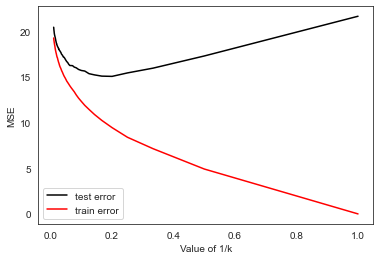

In [207]:
k_range = range(1, 101, 1)
# test_scores_N = []
# train_scores_N = []
k_test = []
k_train= []
RMSE_test = []
RMSE_train = []
for k in k_range:
    a = 1/k
    
    #test
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
#     knn.predict(X_testing)[0:5]
    knn_test_predict=knn.predict(X_test)
    b = knn.score(X_test, y_test)
#     test_scores_N.append(1-b)
    k_test.append(1/k)
    
#     RMSE_test
    RMSE_testing = metrics.mean_squared_error(y_test, knn_test_predict)
    RMSE_test.append(RMSE_testing)    
    
    #train   
#     knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
#     knn.predict(X_testing)[0:5]
    knn_train_predict=knn.predict(X_train)
    c = knn.score(X_train, y_train)
#     train_scores_N.append(1-c)
    k_train.append(1/k)
    
    #RMSE_train
    RMSE_training = metrics.mean_squared_error(y_train, knn_train_predict)
    RMSE_train.append(RMSE_training)
    
#     print(knn_test_predict)
    
#train
train_error = min(RMSE_train)
kBestRMSE_train = k_range[RMSE_train.index(min(RMSE_train))]
print("the smallest normalized training RMSE is: ", train_error,", when k = ",kBestRMSE_train)

#test
test_error = min(RMSE_test)
kBestRMSE_test = k_range[RMSE_test.index(min(RMSE_test))]
print("the smallest normalized testing MSE is: ", test_error,", when k = ",kBestRMSE_test)
    
plt.plot(k_test, RMSE_test,color='black',label='test error')
plt.plot(k_train, RMSE_train,color='red',label ='train error')

plt.xlabel('Value of 1/k')
plt.ylabel('MSE')

plt.legend()
plt.show()

(j)Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

KNN: the smallest normalized test error is:  0.05442310724402266 , when k =  5 (Normalized).   
And the the smallest testing MSE is:  14.14467512626262 , when k =  4 (raw data).  


Linear Regression: The smallest testing MSE is 17.588478994554883.  
So the KNN results is better, based on the MSE values.

References:

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, http://dx.doi.org/10.1016/j.ijepes.2014.02.027.
(http://www.sciencedirect.com/science/article/pii/S0142061514000908)

scikit-learn： https://blog.csdn.net/lynn_001/article/details/86688061

statsmodels-OLS: https://ldzhangyx.github.io/2018/12/18/ols/

https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

Dataframe: https://www.cnblogs.com/wodexk/p/10316793.html

pandas.DataFrame.plot.scatter: https://blog.csdn.net/ChenVast/article/details/81631130

R square: https://zhuanlan.zhihu.com/p/159000427

numpy.delete: https://numpy.org/doc/stable/reference/generated/numpy.delete.html

KNN Regression: https://scikitlearn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7